# Model Evalution

## 1) Importing Data and required Libraries

In [1]:
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn import metrics


In [2]:
data = fetch_20newsgroups()
categories = ['sci.med','sci.space','talk.politics.misc','rec.sport.baseball']
train_data = fetch_20newsgroups(subset ="train", categories= categories, shuffle = True)
test_data = fetch_20newsgroups(subset ="test", categories= categories, shuffle = True)

## 2) Model Training

In [3]:
text_clf = Pipeline([('vect', TfidfVectorizer()), ('clf', MultinomialNB()) ])

# train the model
text_clf.fit(train_data.data, train_data.target)
# Predict the test cases
predicted = text_clf.predict(test_data.data)

## 3) Evaluating the Model

In [4]:
print(f'Accuracy achieved is  {str(np.mean(predicted == test_data.target))}\n')
print(metrics.classification_report(test_data.target, predicted, target_names=test_data.target_names))

Accuracy achieved is  0.9398797595190381

                    precision    recall  f1-score   support

rec.sport.baseball       0.95      0.99      0.97       397
           sci.med       0.94      0.94      0.94       396
         sci.space       0.91      0.97      0.94       394
talk.politics.misc       0.97      0.83      0.90       310

          accuracy                           0.94      1497
         macro avg       0.94      0.93      0.94      1497
      weighted avg       0.94      0.94      0.94      1497



### Analysing the confusion_matrix

In [5]:
metrics.confusion_matrix(test_data.target, predicted)

array([[393,   0,   3,   1],
       [  8, 373,  11,   4],
       [  1,   7, 384,   2],
       [ 10,  18,  25, 257]])

### Ploting the confusion_matrix

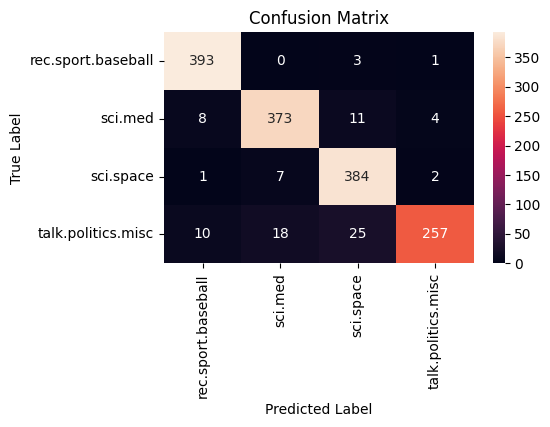

In [6]:
cf = metrics.confusion_matrix(test_data.target, predicted)


plt.figure(figsize=(5, 3))
sns.heatmap(cf, annot=True, fmt='g', xticklabels=train_data.target_names, yticklabels=train_data.target_names)
plt.title("Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()